<a href="https://colab.research.google.com/github/vkchadha12/cs634/blob/milestone-2/milestone2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [162]:
!pip install shap
!pip install category_encoders




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [146]:
import numpy as np
import pandas as pd
filename ='train.csv'

In [163]:
import xgboost
import shap
import pandas as pd
from sklearn import preprocessing
lbl = preprocessing.LabelEncoder()
import category_encoders as ce


def convert_obj_to_str(X, obj_list):
  ''' function to convert '''

  for feature in obj_list:
    X[feature] = lbl.fit_transform(X[feature].astype(str))
  return X

def prep_X(data, object_features, type= 'train' ):
  if ( type.lower() == 'train'.lower() ):
  # remove the y column
      data = convert_obj_to_str(data [data.columns[:-1]], object_features)
  return convert_obj_to_str(data, object_features)

def prep_y(data) :
  return data[data.columns[-1]]

def prep_data(filename, object_features, data_type= 'train'):
  data = pd.read_csv( filename)
  return prep_X(data, object_features, data_type ), prep_y(data)



In [190]:
object_features = ["MSZoning","Street","Alley","LotShape","LandContour","Utilities",
"LotConfig","LandSlope","Neighborhood","Condition1","Condition2","BldgType",
"HouseStyle","RoofStyle","RoofMatl","Exterior1st","Exterior2nd","MasVnrType",
"ExterQual","ExterCond","Foundation","BsmtQual","BsmtCond","BsmtExposure",
"BsmtFinType1","BsmtFinType2","Heating","HeatingQC","CentralAir","Electrical",
"KitchenQual","Functional","FireplaceQu","GarageType","GarageFinish",
"GarageQual","GarageCond","PavedDrive","PoolQC","Fence","MiscFeature",
"SaleType","SaleCondition",
]
filename ='train.csv'
#data = pd.read_csv( filename)
#convert_obj_to_str(data [data.columns[:-1]])
train_X,train_y= prep_data(filename, object_features,  'train')
model = xgboost.XGBRegressor( max_depth=20).fit(train_X, train_y)



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [181]:
data_file ='test.csv'
test_X,test_y= prep_data(data_file,object_features, 'test')



In [182]:
explainer = shap.Explainer(model)
shap_values = explainer(train_X)


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


# Result of the Shap Values.

Top 5 to 6 features explain. 70 % of the prediction which other 71 + feastures only eplain 30 % of the prediction.
Features in Red lead to better predition which features in blue lead lower preidction.
Most important features <b>GrLivArea, OverAllQual & KitchQual<b>

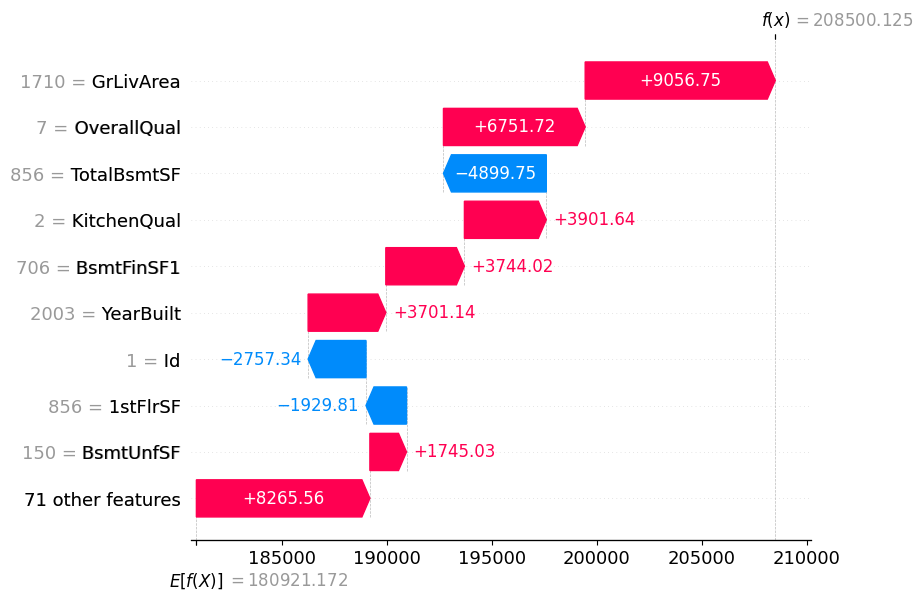

In [183]:

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

In [184]:
shap.initjs()
shap.plots.force(shap_values[0])

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


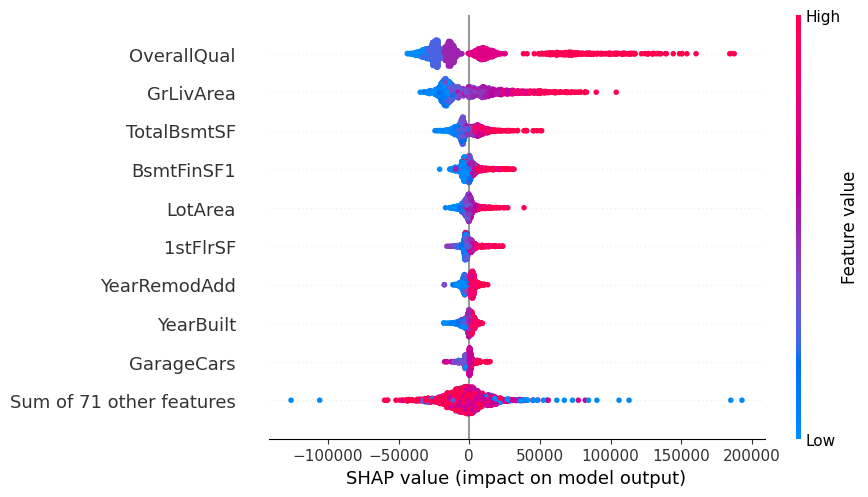

In [185]:
shap.plots.beeswarm(shap_values )


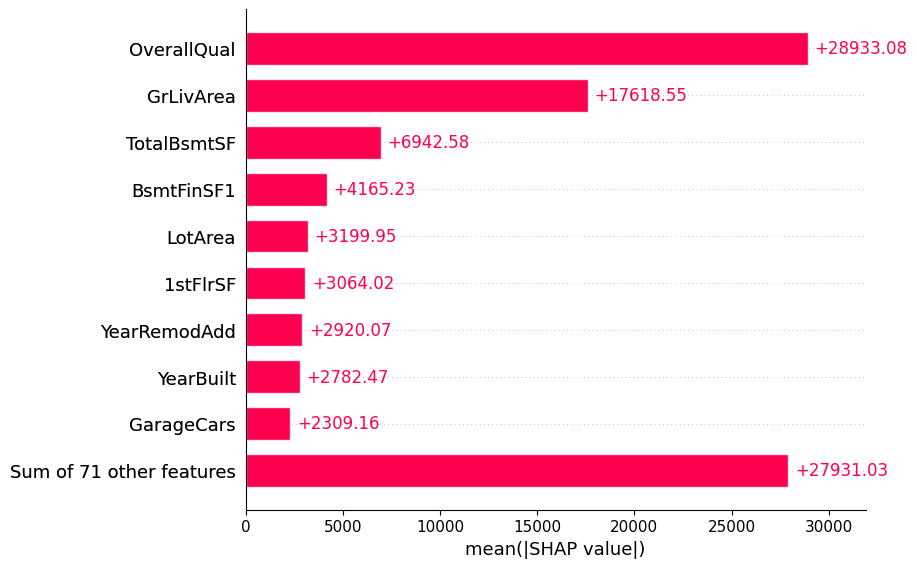

In [187]:
shap.plots.bar(shap_values)


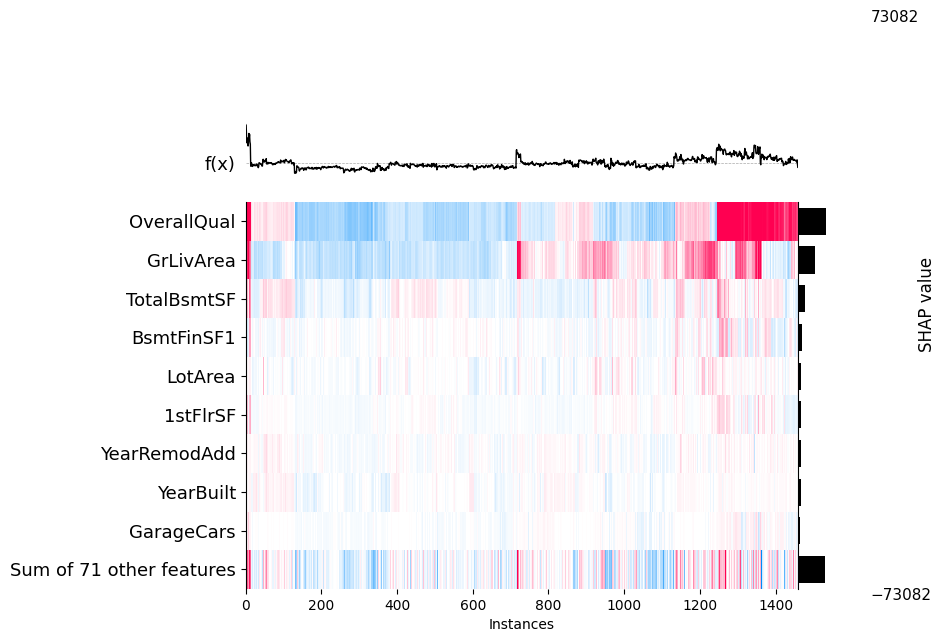

In [188]:
shap.plots.heatmap(shap_values)

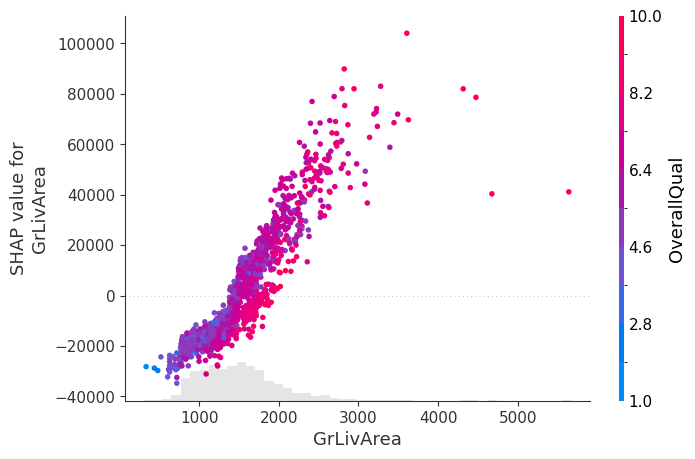

In [189]:
shap.plots.scatter(shap_values[:,"GrLivArea"], color= shap_values)

In [174]:
test_X,test_y = prep_data('test.csv',object_features , 'test')
pred_y = model.predict(test_X)